# PHY480/905 Semester Project Template

**INSTRUCTIONS**: This is a template to help organize your project.  All projects must include the 5 major sections below (you do not need to use this template file).  Complete your work below and remove content in parentheses. 

#### PHY 480/905 Semester Project
### &#9989; Sara Sawford

#### &#9989; April 16, 2023

# ___PROJECT TITLE HERE___

## Introduction 


The Van der Pol oscillator is a non-linear oscillator given by the homogenous second order differential equation
\begin{equation}
    \frac{d^2 x}{d^2 t} + \mu(1-x^2)\frac{dx}{dt} = 0,
\end{equation}
where $\mu$ is a scalar that represents the strength of damping and the non-linearity of the system [1]. It can be used to describe the current oscillations in a vacuum tube circuit, which acts similarly to an incandescent lightbulb [2].  The circuit can be simplified to a DC voltage source *E* in series with a a non-Ohmic resistor *R*, a capacitor *C*, and an inductor *I*, as shown in Figure 1.  For simplicity, let $L = 1$ such that $V = \frac{dI}{dt}$ (See Appendix A for Proof).

Figure 1: A Van der Pol Oscillator with current that can be represented by Equation 1.


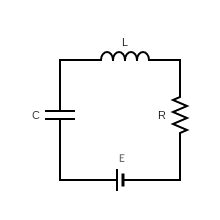

In [4]:
%matplotlib inline
from IPython.display import Image
print("Figure 1: A Van der Pol Oscillator with current that can be represented by Equation 1.")
Image('circuit-2.png')


Briefly, we will show how Equation 1 can be derived [3][4].  We begin by writing the current through the circuit according to Kirchoff's Laws as
\begin{equation}
    L\frac{dI}{dt}+RI+\frac{1}{C}Q = E, \nonumber
\end{equation}
which, when differentiated, becomes the second-order linear differential equation
\begin{equation}
    L\frac{d^2I}{d^t}+R\frac{dI}{dt}+\frac{1}{C}I = 0. \nonumber
\end{equation}
This equation represents a standard damped harmonic oscillator, which occurs when the resistor can assumed to be Ohmic. However, the resistor is non-Ohmic, which means when the current is too low, energy will be added to the system, and when current is too high, energy is damped (not removed, like an Ohmic resistor).  When Van der Pol studied this phenomenon, he found Equation 2 was more accurately stated as 
\begin{equation}
    L\frac{dI}{dt} + (I^2-\alpha)I + \frac{1}{C}Q = E. \nonumber
\end{equation}
By differentiating this equation, we find 
\begin{equation}
    L\frac{d^2I}{d^2t} + 3\frac{dI}{dt}(I^2-\frac{\alpha}{3})I + \frac{1}{C}I = 0. \nonumber
\end{equation}
Once rescaled into dimensionless variables, we find the orginal Van der Pol differential equation, given by Equation 1.

If we include an AC source that produces a voltage $V = Fcos(\omega t)$ in series with the DC source, we add a driving force, Equation 1 then becomes 
\begin{equation}
    \frac{d^2 x}{d^2 t} + \mu(1-x^2)\frac{dx}{dt} = Fcos(\omega t).
\end{equation}

There is not an analytical solution for $\mu \neq 0$ for either Equation 1 or 2, which means we must rely on numerical methods to find the current through the Van der Pol circuit [5].  However, different numerical methods yield different results in terms of the accuracy of convergence to the solution.  We must balance the accuracy we seek to the speed of the algorithm.  Therefore, there are three aim to this paper: to explore the numerical solutions with different damping factors, to explore the accuracy of different numerical methods, and to explore the speeds of the numerical methods.  

Section 3 explores the numerical methods used as well as how the accuracy and speeds for calculated.  We also provide an example of the algorithm's solution to a well-known scenario to ensure accuracy of the algorithm itself.  Section 4 will discuss the results of the algorithm.  There will be two subsections; one subsection will deal with the accuracy of the numerical methods, and the other will describe the speeds of the numerical methods.  Both subsections will provide the results from different damping factor values.  Section 5 will be the conclusion, in which the ideal numerical method will be provided, by weighing both accuracy and speed.  Further perspectives for this project will be considered.

## Methodology

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import math
import time

We begin by modifying the second order differential equation to a linear system of first order differential equations below [6]:

$$
    x_1=\frac{dx}{dt} \nonumber \\ 
    \frac{dx_1}{dt}=\frac{d^2x}{d^2t} -x_2 + \epsilon(1-x_2^2)x_1 \nonumber \\

 
    x_2=x \nonumber \\
    \frac{dx_2}{dt}=\frac{dx}{dt} = x_1 \nonumber \\
$$

In Python, this corresponds to defining a function to take in initial values for $x_1$ and $x_2$, and outputting solutions for $\frac{dx_1}{dt}$ and $\frac{dx_2}{dt}$, as shown in Figure 2.

In [6]:
# Parameters = x (Current I, Voltage V), time, mu
# Returns [dI/dt, dV/dt] to use in numerical methods
def f(x, t, mu):
    # Unpack x = (x1, x2)
    # x1 = Current 
    # x2 = Voltage (dI/dt)
    x1 = x[0]
    x2 = x[1]
    dx1 = -x2+mu*(1-(x2**2))*x1 # dx1/dt
    dx2 = x1 # dx2/dt
    return np.array([dx1,dx2], float)


### A. Numerical Methods

We can use the output of this function to update $x$ and $dx$ using three different methods: Euler's Method (Euler),the Second-Order Runge Kutta Method (RK2), and the Fourth-Order Runge Kutta Method (RK4).

First, let us consider Euler's Method, which can be calculated using the formula $$ x(t+h) \approx x(t) + h f(x,t),$$ and is given by the cell below, except modified to input two variables to represent the two first-order differential equations.

In [7]:
# Euler's Method function- Updates I,V for t+1
# Parameters: I, V, r = [I,V], time, step size
def Euler(y,dy,r,tpoints,h,mu):
    for t in tpoints:
        y.append(r[0])
        dy.append(r[1])
        r += h*f(r,t,mu)


Next, we use the Second-Order Runge Kutta Method (RK2), given by the formula 
$$\begin{align}
k_1 &= hf(x,t) \\
k_2 &= h f\left(x+\frac{1}{2}k_1,t+\frac{1}{2}h \right) \\
x(t+h) &= x(t)+k_2
\end{align}$$

Again, the code in the cell below is modified to update both current and voltage.

In [8]:
# Second-Order Runge Kutta function- Updates I,V for t+1
# Parameters: # Parameters: I, V, r = [I,V], time, step size
def RK2(y,dy, r, tpoints, h,mu):
    for t in tpoints:
        y.append(r[0])
        dy.append(r[1])
        k_1= h*f(r,t,mu)
        k_2 = h*f((r+0.5*k_1),(t+ 0.5*h),mu)
        r += k_2 

Finally, we will study the Fourth-Order Runge Kutta Method (RK4), given by 
$$\begin{align}
k_1 &= hf(x,t) \\
k_2 &= h f\left(x+\frac{1}{2}k_1,t+\frac{1}{2}h \right) \\
k_3 &= h f\left(x+\frac{1}{2}k_2,t+\frac{1}{2}h \right) \\
k_4 &= h f\left(x+\frac{1}{2}k_3,t+h \right) \\
x(t+h) &= x(t)+\frac{1}{6}( k_1+2k_2+2k_3+k_4)
\end{align}$$

In [9]:
# Fourth-Order Runge Kutta function- Updates I,V for t+1
# Parameters: # Parameters: I, V, r = [I,V], time, step size
def RK4(y,dy,r,tpoints,h,mu):
    for t in tpoints:
        y.append(r[0])
        dy.append(r[1])
        k1 = h*f(r,t,mu)
        k2 = h*f(r+0.5*k1,t+0.5*h,mu)
        k3 = h*f(r+0.5*k2,t+0.5*h,mu)
        k4 = h*f(r+k3,t+h,mu)
        r += (k1+2*k2+2*k3+k4)/6

### B. Testing the Numerical Methods

It is especially important to verify the accuracy of the algorithm created because there are not analytical solutions to compare the solutions against.  To verify accuracy, we begin by exploring the solutions to the Van der Pol differential equation without a driving force when $\mu = 0$, which turns Equation 1 into
\begin{equation}
    \frac{d^2 x}{d^2 t} = -x,
\end{equation}
which is the well known formula for a harmonic oscillator with the solution $x(t) = Acos(\omega t)$.  

<!-- \caption{Numerical Solutions for Euler's Method, and the Second- and Fourth-Order Runge-Kutta Method plotted against the analytical solution.  Initial conditions are given as $I(0) = .5 A$, $\frac{dI}{dt} = 0 V$, with a step size of .00001.} -->



Text(0.5, 1.0, 'Difference Between Analytical and Numerical Solutions 0')

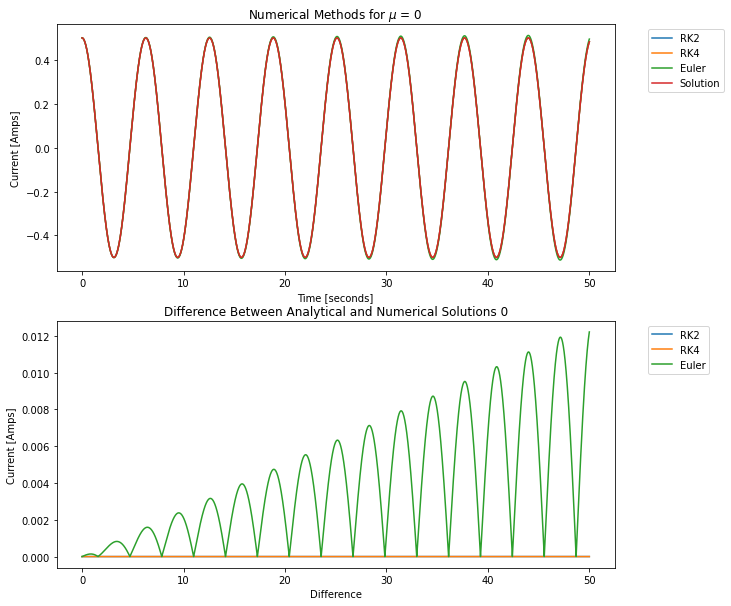

In [10]:
# Start of interval
a = 0.0
# End of interval
b = 50.0

# Number of steps
N = 50000
# Size of single step
h = (b-a)/N

# mu= 0 simplifies dif-eq into easy-to-solve equation to test accuracy of functions
mu = 0.0

# Set up initial arrays
# Array to store time steps
tpoints = np.arange(a,b,h)
# Array to store Current (y)
y = []
# Array to store Voltage (dy)
dy = []
# Initial conditions: I = .5 A, V = 0.
r = np.array([.5,0.],float)

# Append each solution array so all solutions are in one array
y_sol = []
dy_sol = []

# Iterate through three different methods
for i in range(0,3):
    # Reset initial arrays and conditions
    y = []
    dy = []
    r = np.array([.5,0.],float)
    if i == 0:
        # Update y,dy using RK2
        RK2(y,dy,r,tpoints,h, mu)
        # Add current and voltage solutions to array to plot later
        y_sol.append(y)
        dy_sol.append(dy)
    elif i == 1:
        # Update y,dy using RK4
        RK4(y,dy,r,tpoints,h,mu)
        # Append current and voltage solutions to array to plot later
        y_sol.append(y)
        dy_sol.append(dy)

    else:
        # Update y,dy using Euler's Method
        Euler(y,dy,r,tpoints,h,mu)
        # Append current and voltage solutions to array to plot later
        y_sol.append(y)
        dy_sol.append(dy)

# Analytical solution to the Van der Pol Differential Equation when mu = 0.
actual = .5*np.cos(tpoints)

fig, ax = plt.subplots(2,1)
fig.set_size_inches(10,10)
# Plot RK2 against time
ax[0].plot(tpoints,y_sol[0], label = "RK2")
# Plot RK4 against time
ax[0].plot(tpoints,y_sol[1], label = "RK4")
# Plot Euler against time
ax[0].plot(tpoints,y_sol[2], label = "Euler")
# Plot analytical solution
ax[0].plot(tpoints, actual, label = "Solution")
ax[0].legend(bbox_to_anchor=(1.05,1), loc="upper left")
ax[0].set_xlabel("Time [seconds]")
ax[0].set_ylabel("Current [Amps]")
ax[0].set_title("Numerical Methods for $\mu$ = " + str(0))

ax[1].plot(tpoints,abs(y_sol[0] - actual), label = "RK2")
# Plot RK4 against time
ax[1].plot(tpoints,abs(y_sol[1] - actual), label = "RK4")
# Plot Euler against time
ax[1].plot(tpoints,abs(y_sol[2] - actual), label = "Euler")
# Plot analytical solution
ax[1].legend(bbox_to_anchor=(1.05,1), loc="upper left")
ax[1].set_xlabel("Difference")
ax[1].set_ylabel("Current [Amps]")
ax[1].set_title("Difference Between Analytical and Numerical Solutions " + str(0))

Clearly, the Second- and Fourth-Order Runge Kutta solutions converge to the analytic solution almost immediately, while Euler's method seems to diverge from the solution.  However, the difference between the analytical and Euler's solution is only 12% after 50 seconds, so the difference can be excused.  Therefore, we have verified the accuracy of these numerical methods, and may now begin the analysis of the accuracy at different step sizes and speed of convergence.

### C. Calculating Accuracy and Speed
Now that our functions have been tested, we can figure out which numerical method will converge to a solution with the fewest step sizes and the fastest.  Although there is no analytical solution for $\mu \neq 0$, we assert that a solution will be found when difference between the plots of two different step sizes is approximately 0.  The step sizes used are $$N = 100, 250, 500, 1000, 2500, 5000, 7500, 10000.$$

We will start with a function that inputs the number of points to calculate the current for between two bounds and an index to plot the results on separate subplots.  For this section, we will assume $\mu = .1$, and $I(0) = .5 A$, and $V(0) = 0 V$.

In [70]:
def changing_number_points(N, index, mu, ax):
    ''' 
    Run each numerical method and plot results for different number of steps
    Parameters:
        N (string): Number of steps, 
        index (int): index of subplot to plot results in
        mu (float): damping factor
    Returns:
        y_sol (array): Solution to current
        dy_sol (array): Solution to voltage (dI/dt)
        t (array): Speed of numerical method
    '''

    # Start of interval
    a = 0.0
    # End of interval
    b = 50.0

    # Size of single step
    h = (b-a)/N

    # mu= 0 simplifies dif-eq into easy-to-solve equation to test accuracy of functions
    mu = mu

    # Set up initial arrays
    # Array to store time steps
    tpoints = np.arange(a,b,h)
    # Array to store Current (y)
    y = []
    # Array to store Voltage (dy)
    dy = []
    # Initial conditions: I = .5 A, V = 0.
    r = np.array([.5,0.],float)

    # Append each solution array so all solutions are in one array
    y_sol_rk2 = []
    y_sol_rk4 = []
    y_sol_euler = []
    # y_sol = []
    dy_sol = []

    t = []

    for i in range(0,3):
        # Reset initial arrays and conditions
        y = []
        dy = []
        r = np.array([.5,0.],float)

        st = time.time()

        if i == 0:
            # Update y,dy using RK2
            RK2(y,dy,r,tpoints,h, mu)
            # Add current and voltage solutions to array to plot later
            y_sol_rk2 = y
            dy_sol.append(dy)
            
        elif i == 1:
            # Update y,dy using RK4
            RK4(y,dy,r,tpoints,h,mu)
            # Append current and voltage solutions to array to plot later
            y_sol_rk4 = y
            dy_sol.append(dy)

        else:
            # Update y,dy using Euler's Method
            Euler(y,dy,r,tpoints,h,mu)
            # Append current and voltage solutions to array to plot later
            y_sol_euler = y
            dy_sol.append(dy)

        et = time.time()
        t.append(et - st)

    # Plot the current as a function of time for each numerical method
    if(all(x < 100 for x in y_sol_rk2)):
        ax[index].plot(tpoints,y_sol_rk2, label = "RK2")
    if(all(x < 100 for x in y_sol_rk4)):
        ax[index].plot(tpoints,y_sol_rk4, label = "RK4")
    if(all(x < 100 for x in y_sol_euler)):
        ax[index].plot(tpoints,y_sol_euler, label = "Euler")

    ax[index].legend()
    ax[index].set_xlabel("t")
    ax[index].set_ylabel("x(t)")
    ax[index].set_title("N = " + str(N))

    return y_sol_rk2, y_sol_rk4, y_sol_euler, dy_sol, t


We will utilize a SciPy method called *signal.find_peaks_cwt*, which takes in an array and the width of the matrix used in calculations, and returns an array of the indices of the relative maxima of the initial array.  For the remainder of this study, the relative maxima will be the peaks of the current output.

In [71]:
from scipy.signal import find_peaks_cwt

Next, we write a function that will take in the peak values, and will make a scatter plot of the absolute value of the average difference between the peaks of two step sizes versus the step size.  I let the x-values be the greater of the two step sizes compared. For example, if I compared N = 100 against N = 250, the results would be plotted at N = 250. 

In [165]:
# Makes scatter plot of the average difference between the peak of two different step sizes versus step size
# Inputs: N (array of different step sizes), peaks (array of indices in the solution array of the relative maxima)
# Outputs: Scatter plot, array with the average distance between the peaks
def accuracy(N, peaks, y_sol, method, ax1, mu):
    # Emtpy array to fill with average distances between peaks
    average = []

    if mu == 1:
        y = y_sol
        new_peaks = []

        temp1 = []
        temp2 = []
        for i in range(len(peaks)):
            temp1 = []
            temp2 = []

            for val in peaks[i]:
                if abs(y[i][val]) >= 2:
                    temp2.append(val)
            new_peaks.append(np.array(temp2))

        peaks = new_peaks
    # Don't include 0 plotting i and i-1
    for i in range(1,len(peaks)):
        # Initialize empty arrays that store the current at the index indicated (the relative maximum current)
        temp1 = []
        temp2 = []
        # Adding all relative maxima to an array
        for val in peaks[i]:
            temp1.append(y_sol[i][val])
        # Same functionality as above two lines except for i-1 to get the previous step size results
        for val in peaks[i-1]:
            temp2.append(y_sol[i-1][val])
        # If there is only one peak listed, will subtract single peak from each peak in other array
        if(len(temp1) == 1 or len(temp2) == 1):
            # average.append(np.average((abs(np.array(temp1)) - (abs(np.array(temp2))))))
            average.append(np.average((np.array(temp1)) - ((np.array(temp2)))))

        else:
            # If different number of peaks, edit array so same length
            # Removing any peak that is above the length of the smaller array
            if len(temp1) > len(temp2):
                temp1 = temp1[:len(temp2)]
            elif len(temp2) > len(temp1):
                temp2 = temp2[:len(temp1)]
            average.append((np.average((abs(np.array(temp1)) - (abs(np.array(temp2)))))))
    # Plot step size versus absolute value of average distance
    ax1.scatter(N[1:],(np.array(average)), label = method)
    ax1.set_xlabel("N = Step Size")
    ax1.set_ylabel("Average Distance Between Peaks")
    ax1.set_title("Average Distance Between Peaks vs Step Size")
    ax1.legend()


In [166]:
def putting_it_together(mu, ax, ax1, ax2):
    # Initialize all step sizes studied
    N = [100, 250, 500, 1000, 2500, 5000, 7500, 10000]

    # Set up plots to show solutions for current vs time

    # Initialze empty arrays to store time, current solutions, voltage solutions, and relative maxima of current
    y_sol_rk2 = []
    y_sol_rk4 = []
    y_sol_euler = []

    dy_sol = []
    speed = []

    rk2_peaks = []
    rk4_peaks = []
    euler_peaks = []

    print("Plotting solution to differential equation for different values of N")
    # Run changing_number_points for each step size in N
    for i in range(int(len(N))):
        # Save time, current, and voltage
        rk2, rk4, euler, dy, t = changing_number_points(N[i],i, mu, ax)
        y_sol_rk2.append(rk2)
        y_sol_rk4.append(rk4)
        y_sol_euler.append(euler)

        dy_sol.append(dy)
        speed.append(t)
        
        # # Calculate relative maxima of current for each numerical method for all time steps 
        # # Only through 49 because (1,50) gives different number of peaks for each step size
        index = (find_peaks_cwt(y_sol_rk2[i], np.arange(1,49)))
        rk2_peaks.append(index)
        
        index = (find_peaks_cwt(y_sol_rk4[i], np.arange(1,49)))
        rk4_peaks.append(index)

        index = (find_peaks_cwt(y_sol_euler[i], np.arange(1,49)))
        euler_peaks.append(index)

    print("Plotting average difference between the same peaks of two different step sizes")
    accuracy(N, rk2_peaks, y_sol_rk2, "RK2", ax1, mu)
    accuracy(N, rk4_peaks, y_sol_rk4, "RK4", ax1, mu)
    accuracy(N, euler_peaks, y_sol_euler, "Euler", ax1, mu)
    ax1.axhline(y = 0, color = "black", linewidth = .5)

    print("Plotting speed of each numerical method")    
    rk2_time = []
    rk4_time = []
    euler_time = []

    for i in range(len(speed)):
        rk2_time.append(speed[i][0])
        rk4_time.append(speed[i][1])
        euler_time.append(speed[i][2])

    ax2.scatter(N,rk2_time, label = "RK2")
    ax2.scatter(N,rk4_time, label = "RK4")
    ax2.scatter(N,euler_time, label = "Euler")
    ax2.legend()
    ax2.set_xlabel("N = Step Size")
    ax2.set_ylabel("log(Time) (s)")
    ax2.set_yscale("log")
    ax2.set_title("Step Size vs Time")

## Results and Discussion

#### A. Accuracy at Different Step Sizes
We begin by calling the function *changing_number_points* for a range of different numbers of steps.  This gives us a plot of current vs time, for diffeerent step sizes.  With the output of the function, I also call the SciPy method *find_peaks_cwt* to find the indices of the relative maxima of each step size. 

Plotting solution to differential equation for different values of N
Plotting average difference between the same peaks of two different step sizes
Plotting speed of each numerical method


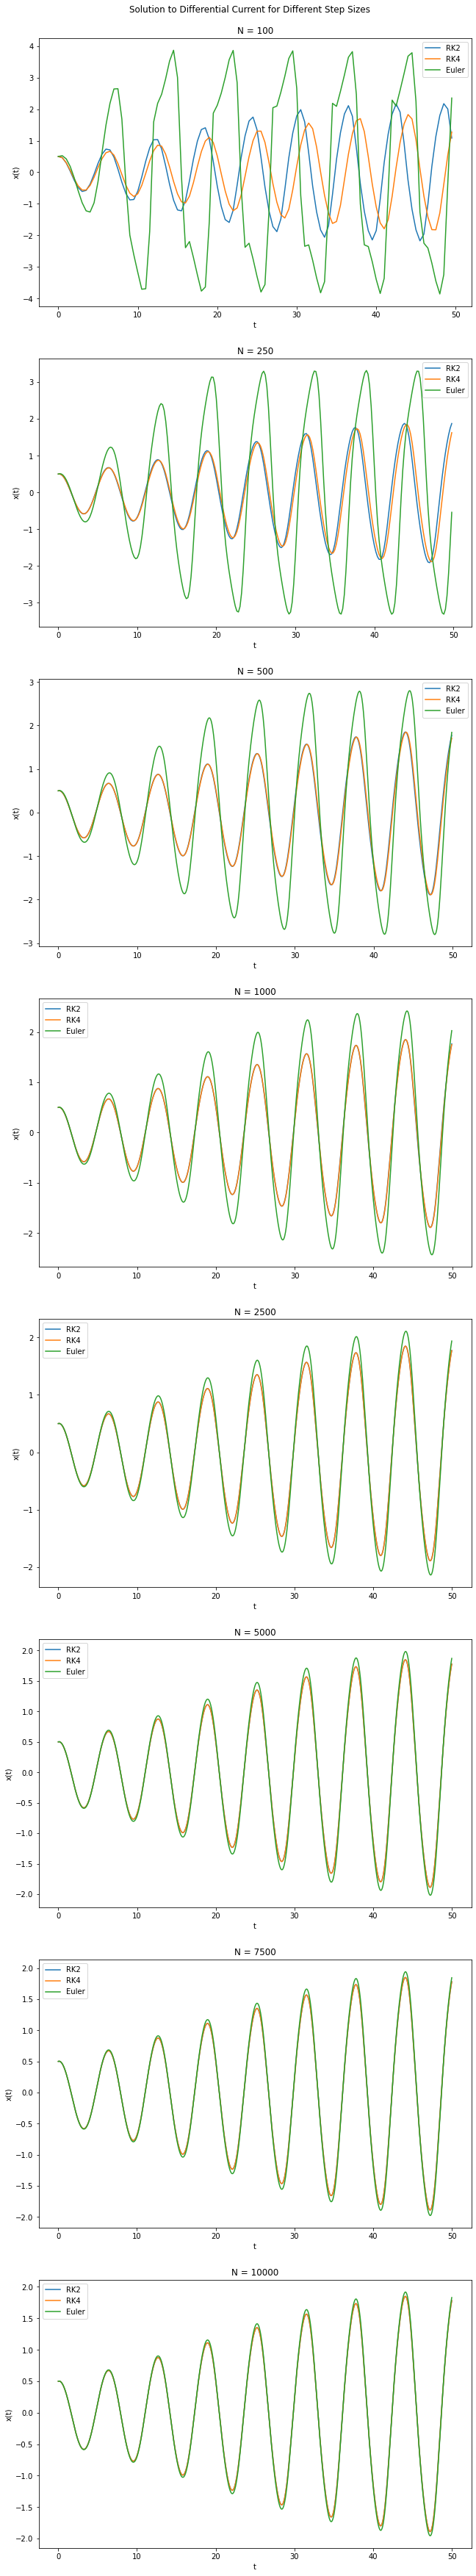

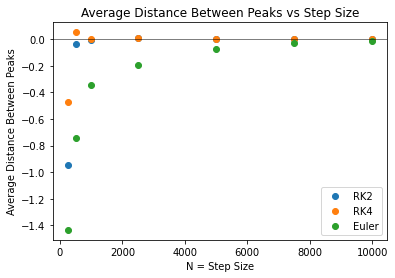

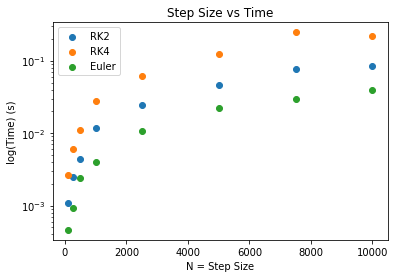

In [167]:
fig,ax = plt.subplots(8)
fig.set_size_inches(10,50)
fig.suptitle("Solution to Differential Current for Different Step Sizes")
fig.tight_layout(pad = 5)

fig1,ax1 = plt.subplots(1)
fig1, ax2 = plt.subplots(1)
putting_it_together(.1, ax, ax1, ax2)

Based on the plots of the solution to the differential equation, the Second-Order Runge Kutta Method is equal to the Fourth-Order Runge Kutta Method by 500 steps.  However, even after 10,000 steps, Euler's Method is still not perfectly converged with the Runge Kutta Methods.  

However, to compare the accuracy of each method, we call the function *accuracy*, which plots the absolute value of the average difference between the peaks versus the step size.  Based on the plot of Average Distance Between Peaks vs Step Size, it appears both Runge-Kutta Methods are about equal after $N = 500$, and the differences appear to converge to 0 by $N = 1000$.  Euler's Method takes a little bit longer to converge to 0, and appears to converge by $N = 10000$.

When plotting the time, I used a *log* scale to get a better visual on the time it took to ran the numerical methods at small step sizes.

We now repeat the same method for $\mu = 1$ and $\mu = 5$ for the cases of critically damped and overdamped.

Plotting solution to differential equation for different values of N


/var/folders/zc/lq5lb1kj747f10z83djsw_t80000gn/T/ipykernel_712/4071389751.py:9: RuntimeWarning: overflow encountered in double_scalars
  dx1 = -x2+mu*(1-(x2**2))*x1 # dx1/dt
/var/folders/zc/lq5lb1kj747f10z83djsw_t80000gn/T/ipykernel_712/4071389751.py:9: RuntimeWarning: invalid value encountered in double_scalars
  dx1 = -x2+mu*(1-(x2**2))*x1 # dx1/dt
/var/folders/zc/lq5lb1kj747f10z83djsw_t80000gn/T/ipykernel_712/2381612794.py:8: RuntimeWarning: invalid value encountered in add
  k_2 = h*f((r+0.5*k_1),(t+ 0.5*h),mu)
/var/folders/zc/lq5lb1kj747f10z83djsw_t80000gn/T/ipykernel_712/3913746742.py:7: RuntimeWarning: invalid value encountered in add
  r += h*f(r,t,mu)


Plotting average difference between the same peaks of two different step sizes
Plotting speed of each numerical method


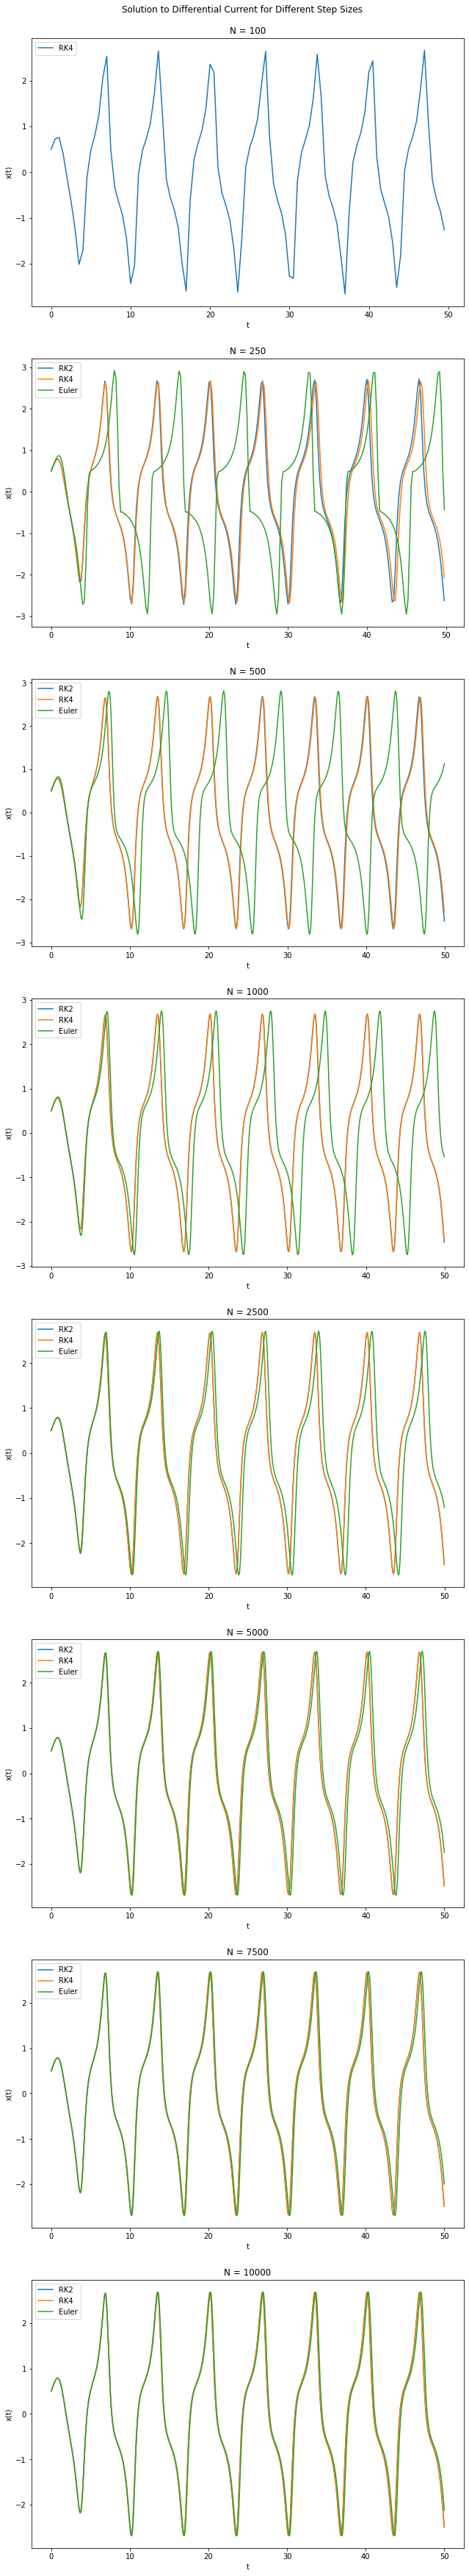

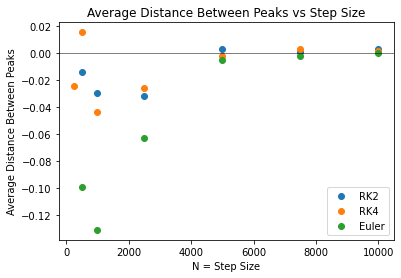

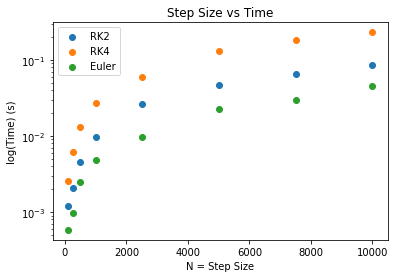

In [168]:
fig,ax = plt.subplots(8)
fig.set_size_inches(10,50)
fig.suptitle("Solution to Differential Current for Different Step Sizes")
fig.tight_layout(pad = 5)

fig1,ax1 = plt.subplots(1)
fig1, ax2 = plt.subplots(1)
putting_it_together(1, ax, ax1, ax2)

/var/folders/zc/lq5lb1kj747f10z83djsw_t80000gn/T/ipykernel_712/4071389751.py:9: RuntimeWarning: overflow encountered in double_scalars
  dx1 = -x2+mu*(1-(x2**2))*x1 # dx1/dt
/var/folders/zc/lq5lb1kj747f10z83djsw_t80000gn/T/ipykernel_712/2381612794.py:8: RuntimeWarning: invalid value encountered in add
  k_2 = h*f((r+0.5*k_1),(t+ 0.5*h),mu)
/var/folders/zc/lq5lb1kj747f10z83djsw_t80000gn/T/ipykernel_712/4071389751.py:9: RuntimeWarning: invalid value encountered in double_scalars
  dx1 = -x2+mu*(1-(x2**2))*x1 # dx1/dt
/var/folders/zc/lq5lb1kj747f10z83djsw_t80000gn/T/ipykernel_712/1940752569.py:11: RuntimeWarning: invalid value encountered in add
  r += (k1+2*k2+2*k3+k4)/6
/var/folders/zc/lq5lb1kj747f10z83djsw_t80000gn/T/ipykernel_712/3913746742.py:7: RuntimeWarning: invalid value encountered in add
  r += h*f(r,t,mu)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with l

Plotting solution to differential equation for different values of N
Plotting average difference between the same peaks of two different step sizes
Plotting speed of each numerical method


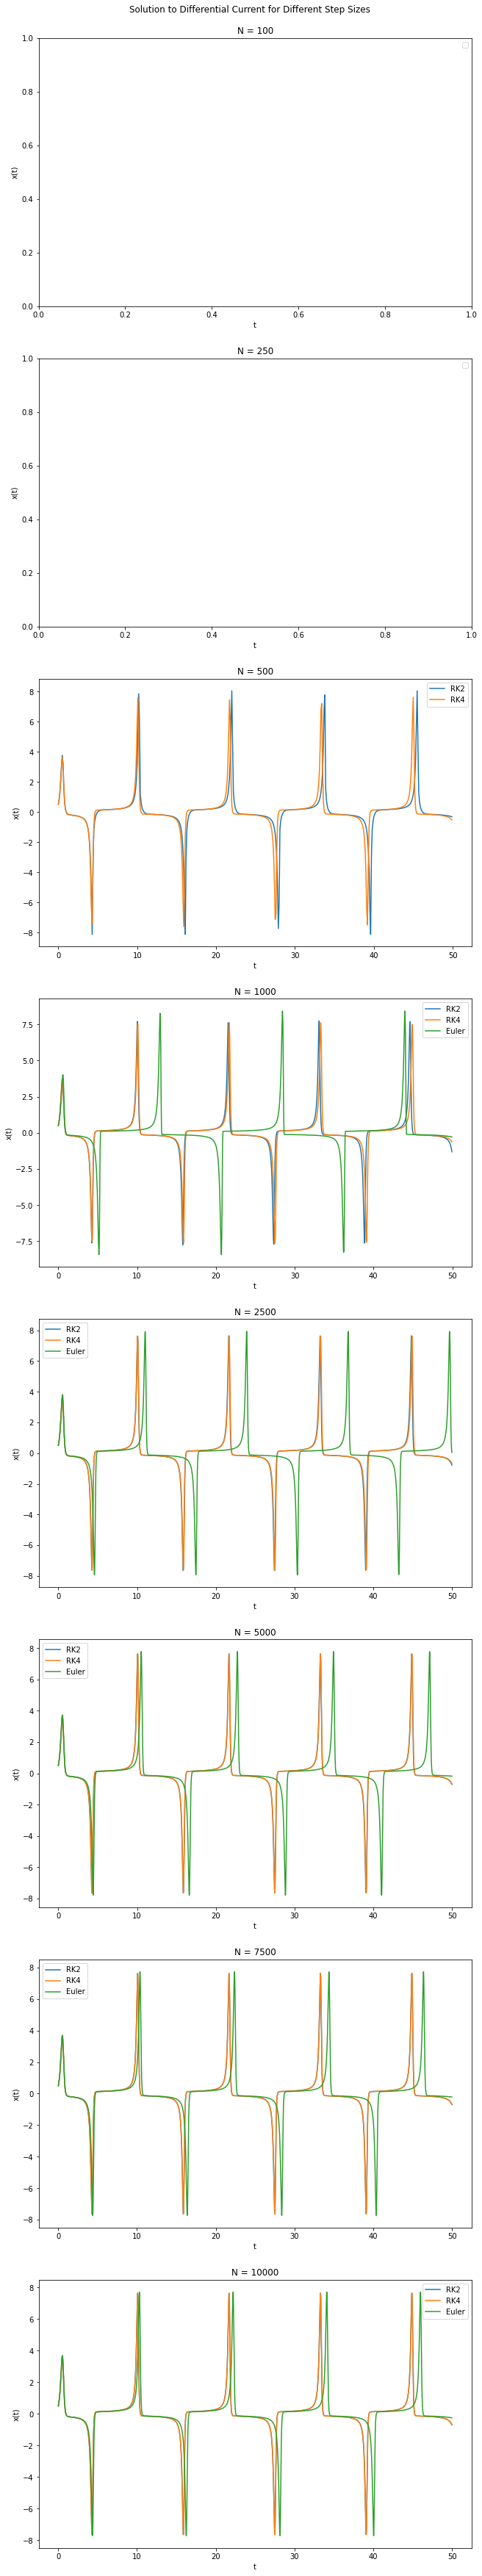

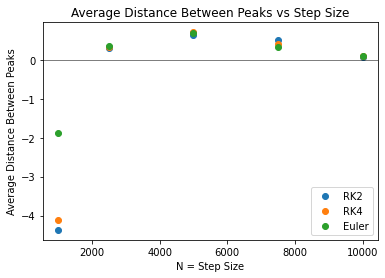

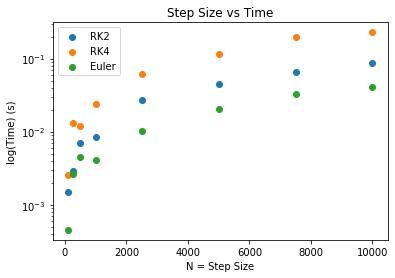

In [172]:
fig,ax = plt.subplots(8)
fig.set_size_inches(10,50)
fig.suptitle("Solution to Differential Current for Different Step Sizes")
fig.tight_layout(pad = 5)

fig1,ax1 = plt.subplots(1)
fig1, ax2 = plt.subplots(1)
putting_it_together(5, ax, ax1, ax2)

##  Conclusion and Perspectives

_(What did you learn from your results? What obstacles did you run into? What would you do differently next time? Clearly provide quantitative answers to your question(s)?  At least one of your questions should be answered with numbers.  That is, it is not sufficient to answer "yes" or "no", but rather to say something quantitative such as variable 1 increased roughly 10% for every 1 year increase in variable 2.)_

A difficulty I encountered was in calculating the accuracy based on the values of the peaks. The SciPy method *find_peaks_cwt* returned a different number of indices for some step sizes.  To overcome this, I included code that would decrease the size of the arrays so the two arrays compared were the same size.

To ensure my work was saved if my notebook crashed, I created a GitHub repository that I pushed the most updated copy of this notebook to.  I pushed my updates after every session that I worked on this notebook.  The repository can be found here: https://github.com/sawfords/PHY480_Final_Project/blob/master/Sawford_ProjectNotebook.ipynb

## References

1. Van der Pol Oscillator. University of Connecticut Physics. (n.d.). Retrieved April 16, 2023, from \\ https://www.phys.uconn.edu/~rozman/Courses/P2200_13F/downloads/vanderpol/vanderpol-oscillator.c 

2. Silver Noax, W. (2017, November). Vacuum tubes. Nuts and Volts Magazine. Retrieved April 16, 2023, from https://www.nutsvolts.com/magazine/article/vacuum-tubes 

3. Duke Mathematics Department. (1998). The van der Pol System. The van der pol system. Retrieved April 16, 2023, from https://services.math.duke.edu/education/ccp/materials/diffeq/vander/vand1.html 

4. Girotti, M. (n.d.). The Van der Pol Oscillator. GitHub. Retrieved April 17, 2023, from https://mathemanu.github.io/VanderPol.pdf 

5. Salas, A., Martínez H, L. J., &amp; Ocampo R, D. L. (2022, March 25). Analytical and Numerical Study to a Forced Van der Pol Oscillator. Mathematical Problems in Engineering. Retrieved April 16, 2023, from https://www.hindawi.com/journals/mpe/2022/9736427/ 

6. Transforming a second-order differential equation into system of first-order. (2021, January 17). Retrieved April 16, 2023, from https://bai-gaming.com/math-guides/transform-second-order-into-system-first-order/ 

##  Appendices


### Appendix A
The voltage change across an inductor can be represented by 
\begin{equation}
    V = I \frac{dI}{dt}. \nonumber
\end{equation}
Therefore, by letting $I = 1 H$, the first derivative of current can be represented simply by the voltage.